In [1]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

## Setup input data

In [2]:
input_data = './diffr.h5'

## Convert one frame to check

### Original

4.276259261054368 5019.2652374619365 4.706651204345967e-06


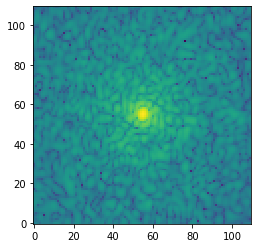

In [3]:
with h5py.File(input_data,'r') as fh:
    diffr = fh['data/0000001/diffr'][...]
    plt.imshow(diffr,norm=colors.LogNorm(vmin=diffr.min(), vmax=diffr.max()),origin='lower')
    print (diffr.mean(),diffr.max(),diffr.min())

### Set multiplication

In [35]:
# multiplication = 1
# multiplication = 1/8e-2
multiplication = 1000

### After multiplication

4192.730826446281 5019265 0 83.0


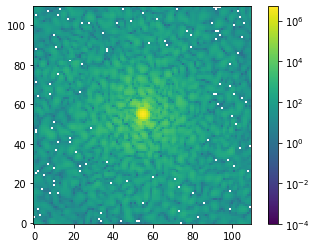

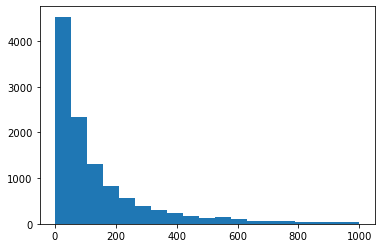

In [45]:
with h5py.File(input_data,'r') as fh:
    new_diffr = fh['data/0000002/diffr'][...]*multiplication
with h5py.File('tmp.h5','w') as f:
    f.create_dataset("diffr", data=new_diffr,dtype='i8')    
with h5py.File('tmp.h5','r') as fh:
    tmp_diffr = fh['diffr'][...]
    plt.imshow(tmp_diffr,norm=colors.LogNorm(vmin=tmp_diffr.min()+0.0001, vmax=tmp_diffr.max()),origin='lower')
    plt.colorbar()
    print (tmp_diffr.mean(),tmp_diffr.max(),tmp_diffr.min(),np.median(tmp_diffr))
    plt.figure()
    plt.hist(tmp_diffr.flatten(),np.linspace(0,1000,20))